In [2]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np

In [4]:
cov_1 = [[0.2,0],[0,0.2]]
m1 = (2,4.5)
data1 = np.random.multivariate_normal(m1,cov_1,(120))*0.3 

In [6]:
cov_2 = [[0.7,0],[0,0.7]]
m2 = (0,0)
data2 = np.random.multivariate_normal(m2,cov_2,(120))*0.5

In [8]:
cov_3 = [[1,0],[0,1]]
m3 = (0,3)
data3 = np.random.multivariate_normal(m3,cov_3,(120))*0.2

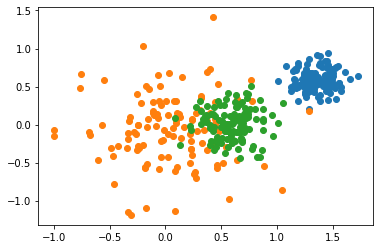

In [17]:
plt.figure()
plt.scatter(data1[:,1],data1[:,0])
plt.scatter(data2[:,1],data2[:,0])
plt.scatter(data3[:,1],data3[:,0])

In [24]:
type(data1)

numpy.ndarray

In [27]:
datafinal1=np.concatenate((data1, data2))

In [28]:
datafinal=np. concatenate((datafinal1,data3))

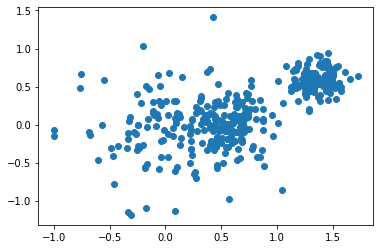

In [29]:
plt.figure()
plt.scatter(datafinal[:,1],datafinal[:,0])

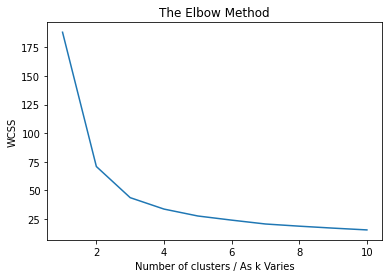

In [30]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(datafinal)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters / As k Varies')
plt.ylabel('WCSS')
plt.show()


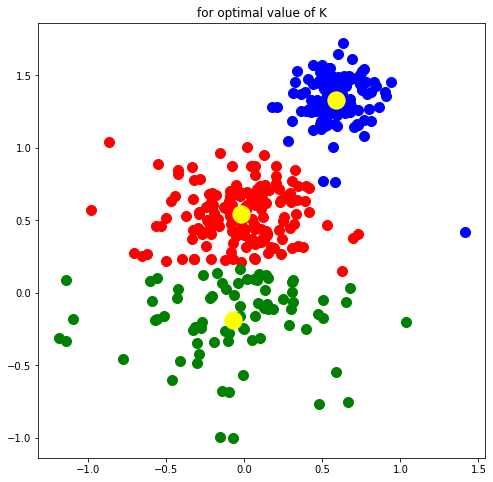

In [34]:
#from the elbow method we get that optimal value for k would be 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(datafinal)

plt.figure(figsize=(8,8))
plt.scatter(datafinal[y_kmeans == 0, 0], datafinal[y_kmeans == 0, 1], s = 100, c = 'red')
plt.scatter(datafinal[y_kmeans == 1, 0], datafinal[y_kmeans == 1, 1], s = 100, c = 'blue')
plt.scatter(datafinal[y_kmeans == 2, 0], datafinal[y_kmeans == 2, 1], s = 100, c = 'green')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('for optimal value of K')
plt.show()

In [49]:
#we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster

for i in range (0,10):
  y=i+1
  #y1=str(y)
  print("Value of WCSS: "+str(wcss[i])+ "for value of k ="+str(y))

Value of WCSS: 188.29170903468358for value of k =1
Value of WCSS: 70.86149542191018for value of k =2
Value of WCSS: 43.63209201899633for value of k =3
Value of WCSS: 33.636234778678926for value of k =4
Value of WCSS: 27.593443306064678for value of k =5
Value of WCSS: 23.974326613856142for value of k =6
Value of WCSS: 20.594482894845164for value of k =7
Value of WCSS: 18.687013756657667for value of k =8
Value of WCSS: 16.976464603209955for value of k =9
Value of WCSS: 15.414947227756567for value of k =10


In [ ]:
#as we can see from our result that while training our model for different values of K we observe the change in WCSS is considerably low when compared to 
#k=2 to k=3 so we take the conclusion that k=3 is optimum value for clustering through Kmean